Table Columns
Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')
Column Shape
(5000, 14)
Column Description
                ID          Age   Experience       Income      ZIP Code  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.104600    73.774200  93152.503000   
std    1443.520003    11.463166    11.467954    46.033729   2121.852197   
min       1.000000    23.000000    -3.000000     8.000000   9307.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mort

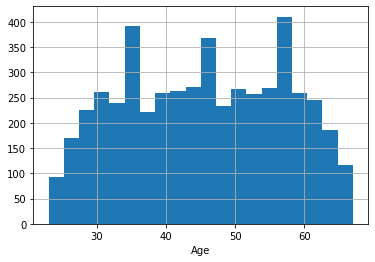

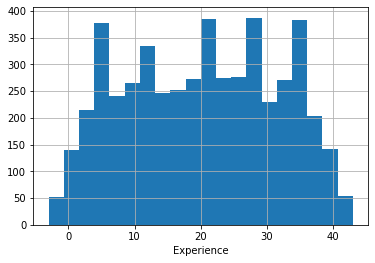

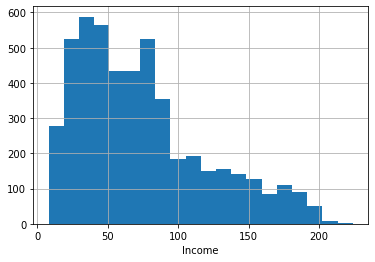

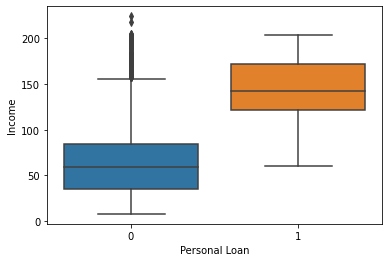

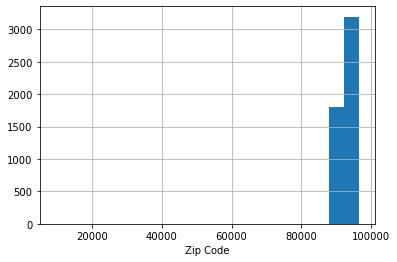

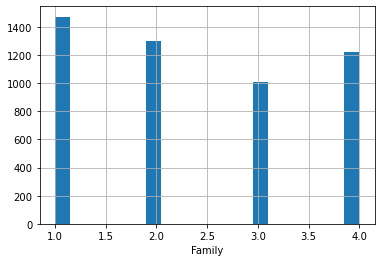

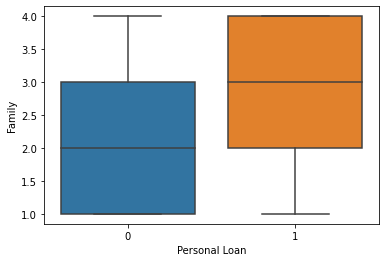

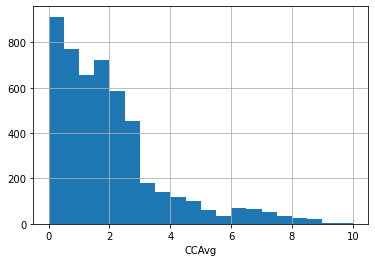

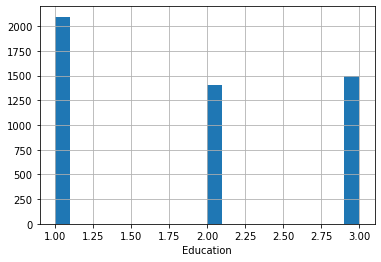

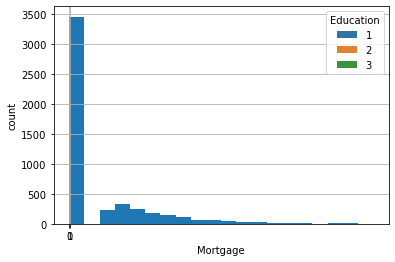

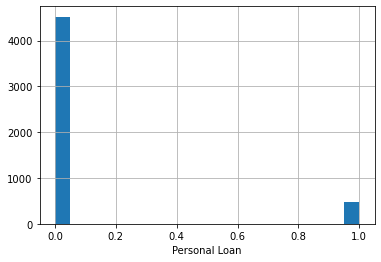

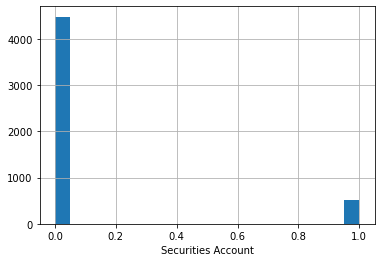

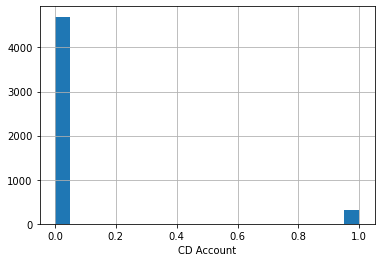

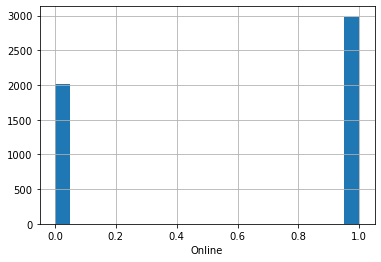

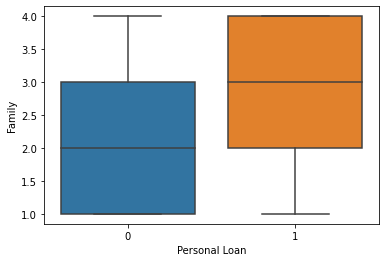

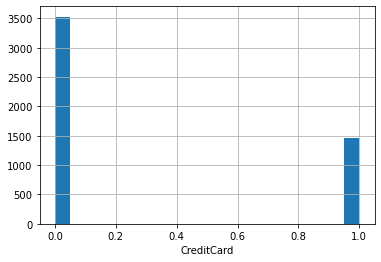

In [1]:
# Project - Visualisation

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# ======================================================================
# Read the column description
# ======================================================================
bank_data = pd.read_csv("Bank_Personal_Loan_Modelling-1.csv")
print("Table Columns")
print("=============")
columns = bank_data.columns
print(columns)
print("Column Shape")
print("============")
shape = bank_data.shape
print(shape)
print("Column Description")
print("==================")
description = bank_data.describe()
print(description)

# ======================================================================
# Study the data distribution in each attribute, share your findings
# ======================================================================
bank_head = bank_data.head()
# Get first 5 table data
print(bank_head)
age_list = list(bank_data["Age"])
exp_list = list(bank_data["Experience"])
inc_list = list(bank_data["Income"])
zip_list = list(bank_data["ZIP Code"])
fam_list = list(bank_data["Family"])
avg_list = list(bank_data["CCAvg"])
edu_list = list(bank_data["Education"])
mor_list = list(bank_data["Mortgage"])
per_list = list(bank_data["Personal Loan"])
sec_list = list(bank_data["Securities Account"])
cd_list = list(bank_data["CD Account"])
net_list = list(bank_data["Online"])
card_list = list(bank_data["CreditCard"])


# 1. Age - Histogram
plt.hist(age_list, bins=20)
plt.grid(True)
plt.xlabel("Age")
plt.show()
# sns.countplot(x="Personal Loan", y="Age", data=bank_data)

# 2. Experience - Histogram
plt.hist(exp_list, bins=20)
plt.grid(True)
plt.xlabel("Experience")
plt.show()

# 3. Income - Histogram
plt.hist(inc_list, bins=20)
plt.grid(True)
plt.xlabel("Income")
plt.show()
# income vs personal loan
sns.boxplot(x="Personal Loan", y="Income", data=bank_data)
plt.show()

# 4. ZIP Code - Histogram
plt.hist(zip_list, bins=20)
plt.grid(True)
plt.xlabel("Zip Code")
plt.show()

# 5. Family - Histogram
plt.hist(fam_list, bins=20)
plt.grid(True)
plt.xlabel("Family")
plt.show()
# income vs personal loan
sns.boxplot(x="Personal Loan", y="Family", data=bank_data)
plt.show()

# 6. CCAvg - Histogram
plt.hist(avg_list, bins=20)
plt.grid(True)
plt.xlabel("CCAvg")
plt.show()

# 7. Education - Histogram
plt.hist(edu_list, bins=20)
plt.grid(True)
plt.xlabel("Education")
plt.show()
sns.countplot(x="Personal Loan", hue="Education", data=bank_data)

# 8. Mortgage - Histogram
plt.hist(mor_list, bins=20)
plt.grid(True)
plt.xlabel("Mortgage")
plt.show()

# 9. Personal Loan - Histogram
plt.hist(per_list, bins=20)
plt.grid(True)
plt.xlabel("Personal Loan")
plt.show()

# 10. Securities Account - Histogram
plt.hist(sec_list, bins=20)
plt.grid(True)
plt.xlabel("Securities Account")
plt.show()

# 11. CD Account - Histogram
plt.hist(cd_list, bins=20)
plt.grid(True)
plt.xlabel("CD Account")
plt.show()

# 12. Online - Histogram
plt.hist(net_list, bins=20)
plt.grid(True)
plt.xlabel("Online")
plt.show()
# online vs personal loan
sns.boxplot(x="Personal Loan", y="Family", data=bank_data)
plt.show()

# 13. CreditCard - Histogram
plt.hist(card_list, bins=20)
plt.grid(True)
plt.xlabel("CreditCard")
plt.show()


In [10]:
# Project
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# ============================================================================
# Split the data into training and test set in the ratio of 70:30 respectively
# ============================================================================
bank_data = pd.read_csv("Bank_Personal_Loan_Modelling-1.csv")
bank_head = bank_data.head()
print(bank_head)
loan_data = list(bank_data["Personal Loan"])
train = bank_data.drop(["ID", "Personal Loan"], axis=1)
test = bank_data['Personal Loan']
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.3, random_state=1)
print("\nX_train:\n")
print(X_train.head())
print(X_train.shape)

print("\nX_test:\n")
print(X_test.head())
print(X_test.shape)

# =================================================================
# Use different classification models (Logistic, Linear) to predict
# the likelihood of a liability customer buying personal loans
# =================================================================

print("\nNull Columns\n")
null_data = bank_data.isnull().sum()
print(null_data)

print("\nLINEAR REGRESSION MODEL:")
print("========================\n")

linear_model = LinearRegression()
# Fit the model to our X and y training sets
linear_model.fit(X_train, y_train)
linear_prediction = linear_model.predict(X_test)
linear_score = linear_model.score(X_test, y_test)
print("Linear Prediction :\n")
print(linear_prediction)
print("Linear Accuracy Score")
print("=====================")
print(linear_score)


print("\n\nLOGISTIC REGRESSION MODEL:")
print("==========================\n")

log_model = LogisticRegression(max_iter=5000)
# Fit the model to our X and y training sets
log_model.fit(X_train, y_train)
logistic_prediction = log_model.predict(X_test)
logistic_score = log_model.score(X_test, y_test)
print("Logistic Prediction :\n")
print(logistic_prediction)
print("\nLogistic Score :\n")
print(logistic_score)

report = classification_report(y_test, logistic_prediction)
print("Logistic Classification Report")
print("==============================")
print(report)

confusion_matrix = confusion_matrix(y_test, logistic_prediction)
print("Logistic Confusion Matrix")
print("=========================\n")
print(confusion_matrix)

accuracy_score = accuracy_score(y_test, logistic_prediction)
print("Logistic Accuracy Score")
print("======================")
print(accuracy_score)





   ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  

X_train:

      Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
133